Follwing classes are there : 
 ['Alligator Cracks', 'Longitudinal Cracks', 'Transverse Cracks']
data length: 132
Length of Train Data : 92
Length of Validation Data : 40


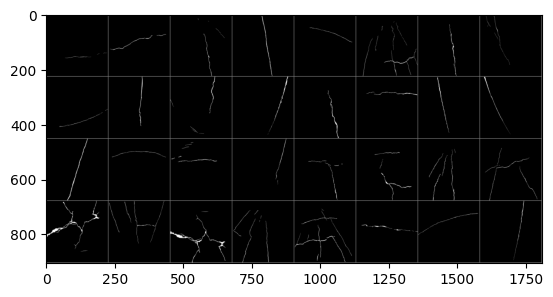

Transverse Cracks Transverse Cracks Longitudinal Cracks Longitudinal Cracks Transverse Cracks Alligator Cracks Longitudinal Cracks Longitudinal Cracks Transverse Cracks Longitudinal Cracks Longitudinal Cracks Longitudinal Cracks Longitudinal Cracks Transverse Cracks Longitudinal Cracks Longitudinal Cracks Longitudinal Cracks Transverse Cracks Transverse Cracks Longitudinal Cracks Alligator Cracks Alligator Cracks Alligator Cracks Alligator Cracks Alligator Cracks Alligator Cracks Alligator Cracks Alligator Cracks Alligator Cracks Transverse Cracks Transverse Cracks Longitudinal Cracks


<Figure size 640x480 with 0 Axes>

In [12]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


#!/usr/bin/env python
# coding: utf-8

# In[ ]:

# License: BSD
# Author: Sasank Chilamkurthy


from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

from random import *
from tqdm.notebook import tqdm, trange
from time import sleep
from pathlib import Path
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, models
from torchvision.datasets import ImageFolder
from warnings import filterwarnings
from sklearn.metrics import accuracy_score
filterwarnings('ignore')


device = torch.device("cpu")
device



##  codes for data augmentation
train_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.FiveCrop(224),
    transforms.Lambda(lambda crops: crops[0]), 
    transforms.RandomHorizontalFlip(p=0.5), ## tamim: image will move left and right
    transforms.RandomVerticalFlip(p=0.5), ## tamim: image will come to eye vertically
    transforms.RandomRotation(degrees=(.5, 5)), ## very small rotation of the cracks
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])


test_trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5), ## tamim: image will move left and right
    transforms.RandomVerticalFlip(p=0.5), ## tamim: image will come to eye vertically
    transforms.RandomRotation(degrees=(.5, 5)), ## very small rotation of the cracks
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])


## Load data
from torchvision.datasets import ImageFolder
data = ImageFolder("D:\\SPRING 2023\\MS_Thesis\\MASTER'S THESIS\\Final Thesis Report\\FINAL_outputs_Final_Report\\ResNet50_transferred_outputs\\Data\\Data_Structure(Annotated)", transform=train_trans , )
test_folder= ImageFolder("D:\\SPRING 2023\\MS_Thesis\\MASTER'S THESIS\Final Thesis Report\FINAL_outputs_Final_Report\ResNet50_transferred_outputs\Data\Data_Structure(Raw images)", transform=test_trans, )


## hyperparameters

batch_size = 32
num_classes = 3
learning_rate = 0.001

## for epoch and optimizer in HPC

import sys

# read the epoch parameter from the command line / shellscript
# num_epochs = int(sys.argv[1])
num_epochs = 30

# read the optimizers from the command line / shellscript
# optimizers = str(sys.argv[2])

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    plt.savefig(f"labels_{num_epochs}.JPG")

# your code for training the model with the given epoch

print("Follwing classes are there : \n",data.classes)


print("data length:", len(data))

classes = ('Alligator Cracks', 'Longitudinal Cracks', 'Transverse Cracks')


##Splitting Data and Prepare Batches: 
## Source: https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48 
val_size = 40 ##  Tamim:30% data for validation ## 
train_size = len(data) - val_size 

## To randomly split the images into training and testing, PyTorch provides random_split()
train_data, val_data = random_split(data,[train_size,val_size]) 
print(f"Length of Train Data : {len(train_data)}")     ## changed the folder names
print(f"Length of Validation Data : {len(val_data)}")

# Splitting train and validation data on batches

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=batch_size) ## defined train data & val data
val_loader = torch.utils.data.DataLoader(val_data, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_folder, shuffle=False, batch_size=batch_size)

# visualize images of a single batch

dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


